In [102]:
#data pre-processing using nltk
import pandas as pd
from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
#reading the data from the csv
tweet_df=pd.read_csv("consolidatedtweets2.csv",encoding="latin1")
#reading the tweets into a list
tweets=tweet_df['Tweet'].values.tolist()
#lematizer = WordNetLemmatizer()
processed_words = []
#stop words
stop = set(stopwords.words('english'))
#for each tweet, perform tokenization, check if each word in tweet is a stop word and 
#if not, convert it into lowercase and then join the words into a tweet at the end.
for sentence in tweets:
    tokenized_words=word_tokenize(str(sentence))
    lematized=[]
    for word in tokenized_words:
        if '-' in word:
            word_list=word.split('-')
            for word in word_list:
                if word not in stop:
                    lower_word = word.lower()
                    lower_word=''.join(w for w in lower_word if not w.isnumeric())
                    lematized.append(lower_word)
        elif word not in stop:
            lower_word = word.lower()
            lower_word=''.join(w for w in lower_word if not w.isnumeric())
            lematized.append(lower_word)
    processed_words.append(" ".join(lematized))
tweet_df['processed tweets']= processed_words
print(len(processed_words))


16000


In [103]:
#shuffling the data so that the class labels will not be like 0 for the first 8000 and 1 for next 800 tweets
import random
from sklearn.utils import shuffle
random.seed(5000)
tweet_df=shuffle(tweet_df)

In [118]:
#pipelining
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

stop_words='samsunggalaxyappleiphones8s7noteedgeiphone6plusiphone7iphone8iphonex'
tweet_df['further processed tweets'] = tweet_df['processed tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#train-test split
X_train,X_test,Y_train,Y_test=train_test_split(tweet_df["further processed tweets"], tweet_df["Label"], test_size=0.2)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
#vectorizer=CountVectorizer()
#vectors=vectorizer.fit_transform(tweet_df["processed tweets"])
#vectors=vectors.toarray()
text_clf = Pipeline([('vect', CountVectorizer(min_df=5,max_df=0.8)),('clf',SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42)) ])
#SGD Classification
text_clf.fit(X_train,Y_train)
predicted = text_clf.predict(X_test)
accuracy10 = accuracy_score(Y_test, predicted)
print("accuracy score:",accuracy10)


#Adaboost classifier
text_clf1 = Pipeline([('vect', CountVectorizer(min_df=5,max_df=0.8)),('clf',AdaBoostClassifier()) ])
text_clf1.fit(X_train,Y_train)
predicted1 = text_clf1.predict(X_test)
accuracy11 = accuracy_score(Y_test, predicted1)
print("accuracy score2:",accuracy11)


accuracy score: 0.8971875
accuracy score2: 0.8309375


In [121]:
#accuracy statistics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


 
print("precision score:",precision_score(Y_test, predicted, average=None)) 
print("recall score:",recall_score(Y_test, predicted, average=None))
print("f1 score:",f1_score(Y_test, predicted, average="weighted"))
print("Confusion matrix\n",confusion_matrix(Y_test, predicted))

print("precision score:",precision_score(Y_test, predicted1, average=None)) 
print("recall score:",recall_score(Y_test, predicted1, average=None))
print("f1 score:",f1_score(Y_test, predicted1, average="weighted"))
print("Confusion matrix\n",confusion_matrix(Y_test, predicted1))


precision score: [ 0.91327201  0.88259833]
recall score: [ 0.87586641  0.91816491]
f1 score: 0.897128063659
Confusion matrix
 [[1390  197]
 [ 132 1481]]
precision score: [ 0.87571839  0.79646018]
recall score: [ 0.76811594  0.89274644]
f1 score: 0.83022259128
Confusion matrix
 [[1219  368]
 [ 173 1440]]


In [122]:
from sklearn.linear_model import LogisticRegression
#logistic regression
logit = Pipeline([('vect', CountVectorizer(min_df=5,max_df=0.8)),('clf',LogisticRegression()) ])
logit.fit(X_train,Y_train)

#accuracy of logistic regression using cross validation

#accuracy of logistic regression using accuracy score
predicted2=logit.predict(X_test) 
print("accuracy score:",accuracy_score(Y_test, predicted2))
print("precision score:",precision_score(Y_test, predicted2, average=None)) 
print("recall score:",recall_score(Y_test, predicted2, average=None))
print("f1 score:",f1_score(Y_test, predicted2, average="weighted"))
print("Confusion matrix\n",confusion_matrix(Y_test, predicted2))

accuracy score: 0.90375
precision score: [ 0.92491694  0.88495575]
recall score: [ 0.87712665  0.9299442 ]
f1 score: 0.903666663864
Confusion matrix
 [[1392  195]
 [ 113 1500]]


In [123]:
#MLP classsifier
from sklearn.neural_network import MLPClassifier
mlp=Pipeline([('vect', CountVectorizer(min_df=5,max_df=0.8)),('clf',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1)) ])
mlp.fit(X_train, Y_train)
mlp_predicted = mlp.predict(X_test)

#Accuracy score
accuracy7 = accuracy_score(Y_test,mlp_predicted)
print("MLP accuracy score:",accuracy7)
print("precision score:",precision_score(Y_test, mlp_predicted, average=None)) 
print("recall score:",recall_score(Y_test, mlp_predicted, average=None))
print("f1 score:",f1_score(Y_test, mlp_predicted, average="weighted"))
print("Confusion matrix\n",confusion_matrix(Y_test, mlp_predicted))

MLP accuracy score: 0.8759375
MLP accuracy score: 0.8759375
precision score: [ 0.87141074  0.88047559]
recall score: [ 0.87964713  0.87228766]
f1 score: 0.875939499078
Confusion matrix
 [[1396  191]
 [ 206 1407]]


In [124]:
#research question 2-vocabulary contributing to more retweets
retweets=sorted(tweet_df["retweets"],reverse=True)[0:100]
influencial_tweets=[]
for tweet,retweet,label in zip(tweet_df["further processed tweets"],tweet_df["retweets"],tweet_df["Label"]):
    if retweet>=retweets[99]:
        influencial_tweets.append([tweet,retweet,label])
influencial_tweets = pd.DataFrame(influencial_tweets)
influencial_tweets.columns=["Tweet","retweets","Label"]
from sklearn.feature_extraction.text import CountVectorizer
count_vect1=CountVectorizer()
count1=count_vect1.fit_transform(influencial_tweets["Tweet"])
count1=count1.toarray()
count1=pd.DataFrame(count1)
count1.columns=count_vect1.vocabulary_
print(len(count1.columns))

778


In [125]:
#research question 2-vocabulary contributing to more favorites
favorites=sorted(tweet_df["favorites"],reverse=True)[0:100]
influencial_tweets1=[]
for tweet,favorite,label in zip(tweet_df["further processed tweets"],tweet_df["favorites"],tweet_df["Label"]):
    if favorite>=favorites[99]:
        influencial_tweets1.append([tweet,favorite,label])
influencial_tweets1 = pd.DataFrame(influencial_tweets1)
influencial_tweets1.columns=["Tweet","favorites","Label"]


count_vect2=CountVectorizer()
count2=count_vect2.fit_transform(influencial_tweets1["Tweet"])
count2=count2.toarray()
count2=pd.DataFrame(count2)
count2.columns=count_vect2.vocabulary_
print(len(count2.columns))
influential_words=[]
for i in count1.columns:
    for j in count2.columns:
        if i==j:
            influential_words.append(i)
print(len(influential_words))
print(influential_words[0:20])

716
507
['high', 'quality', 'qi', 'wireless', 'charger', 'charging', 'pad', 'quick', 'for', 'https', 'seethis', 'co', 'bqmbgl', 'pic', 'twitter', 'com', 'syeupha', 'libera', 'ios', 'novo']


In [110]:
#research question 3- what words in a tweet contribute to the polarity
from afinn import Afinn
from nltk.tokenize import word_tokenize
afin = Afinn()
pscore=[]
for text in tweet_df["further processed tweets"]:
    pscore.append(afin.score(text))
tweet_df["pscore"]=pscore
new_df=tweet_df.sort_values(by='pscore')

['shit', 'die', 'fuck', 'fucking', 'damn', 'ass', 'bad', 'bitch', 'drop', 'hate']
['win', 'gift', 'chance', 'fantastic', 'free', 'best', 'love', 'grand', 'super', 'please']


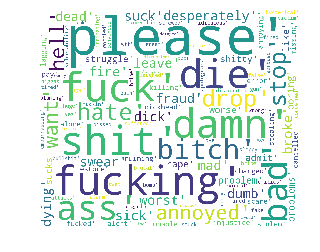

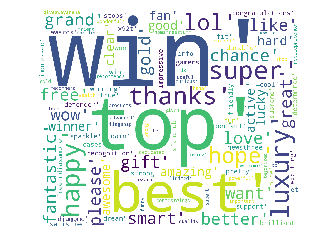

In [115]:
negative_word_count={}
for text in new_df["further processed tweets"][0:82]:
    #scores={}
    #count={}
    for word in word_tokenize(text):
        score=afin.score(word)
        if score!=0:
            #scores[word]=scores.get(word,0)+score
            #count[word]=count.get(word,0)+1
            negative_word_count[word]=negative_word_count.get(word,0)+1
#    score_list.append(list(scores.items()))
 #   count_list.append(list(count.items()))
positive_word_count={}
for text in new_df["further processed tweets"][-1:-592:-1]:
    for word in word_tokenize(text):
        score=afin.score(word)
        if score!=0:
            positive_word_count[word]=positive_word_count.get(word,0)+1
print(sorted(negative_word_count,key=negative_word_count.get,reverse=True)[0:10])
print(sorted(positive_word_count,key=positive_word_count.get,reverse=True)[0:10])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud1 = WordCloud(background_color='white',
                          width=1200,
                          height=1000, stopwords=STOPWORDS,
                         ).generate(str(sorted(negative_word_count,key=negative_word_count.get,reverse=True)))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()
wordcloud2 = WordCloud(background_color='white',
                          width=1200,
                          height=1000, stopwords=STOPWORDS,
                         ).generate(str(sorted(positive_word_count,key=positive_word_count.get,reverse=True)))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()